#### **CHSH inequality for bell states**

<br>

---

**1. Setup**
- Two qubits (Alice and Bob) are prepared in an entangled Bell state.

- Alice chooses one of two measurement settings:
  - A₀ = Z basis
  - A₁ = X basis

- Bob chooses one of two measurement settings:
  - B₀ = $\frac{Z + X}{\sqrt{2}}$ basis
  - B₁ = $\frac{Z - X}{\sqrt{2}}$ basis

<br>

---
**2. Correlation Function**

For settings $$ A_i, B_j $$ the correlation value is:

$$
E(A_i, B_j) = P(00) + P(11) - P(01) - P(10)
$$

<br>

---
**3. CHSH Value**

$$
S = E(A_0,B_0) + E(A_0,B_1) + E(A_1,B_0) - E(A_1,B_1)
$$

<br>

---

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Operator, Pauli, Statevector
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# ---------------------------------
# prepare circuit
# ---------------------------------
def create_bell_states(state : str) -> QuantumCircuit:
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)

    if state == "phi-":
        qc.z(1)
    elif state == "psi+":
        qc.x(1)
    elif state == "psi-":
        qc.x(1)
        qc.z(1)
    return qc

In [3]:
# ---------------------------------
# prepare observables
# ---------------------------------
Z = SparsePauliOp("Z")
X = SparsePauliOp("X")
I = SparsePauliOp("I")

A0 = Z
A1 = X
B0 = ( Z + X ) / np.sqrt(2)
B1 = ( Z - X ) / np.sqrt(2)

A0B0 = A0 ^ B0
A0B1 = A0 ^ B1
A1B0 = A1 ^ B0
A1B1 = A1 ^ B1

s_op = A0B0 - A1B1 + A0B1 + A1B0


In [4]:
def correlations_for_state(label):
    qc = create_bell_states(label)
    sv = Statevector.from_instruction(qc)
    
    E00 = float(sv.expectation_value(A0B0))
    E01 = float(sv.expectation_value(A0B1))
    E10 = float(sv.expectation_value(A1B0))
    E11 = float(sv.expectation_value(A1B1))
    
    return E00, E01, E10, E11

def chsh_from_corr(E00, E01, E10, E11):
    return E00 + E01 + E10 - E11


In [5]:
labels = ["phi+", "phi-", "psi+", "psi-"]
corrs = {}
chsh_vals = []

for lbl in labels:
    E00, E01, E10, E11 = correlations_for_state(lbl)
    S = chsh_from_corr(E00, E01, E10, E11)

    corrs[lbl] = (E00, E01, E10, E11)
    chsh_vals.append(abs(S))

    print(f"|{lbl}>:")
    print(f"  E(A0,B0) = {E00:.4f}")
    print(f"  E(A0,B1) = {E01:.4f}")
    print(f"  E(A1,B0) = {E10:.4f}")
    print(f"  E(A1,B1) = {E11:.4f}")
    print(f"  CHSH = {S:.4f}\n")


|phi+>:
  E(A0,B0) = 0.7071
  E(A0,B1) = 0.7071
  E(A1,B0) = 0.7071
  E(A1,B1) = -0.7071
  CHSH = 2.8284

|phi->:
  E(A0,B0) = 0.7071
  E(A0,B1) = 0.7071
  E(A1,B0) = -0.7071
  E(A1,B1) = 0.7071
  CHSH = 0.0000

|psi+>:
  E(A0,B0) = -0.7071
  E(A0,B1) = -0.7071
  E(A1,B0) = 0.7071
  E(A1,B1) = -0.7071
  CHSH = 0.0000

|psi->:
  E(A0,B0) = -0.7071
  E(A0,B1) = -0.7071
  E(A1,B0) = -0.7071
  E(A1,B1) = 0.7071
  CHSH = -2.8284



/var/folders/7x/ghch8w1j37z38f_5vr6c_lw00000gn/T/ipykernel_74185/3574402723.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  E00 = float(sv.expectation_value(A0B0))
/var/folders/7x/ghch8w1j37z38f_5vr6c_lw00000gn/T/ipykernel_74185/3574402723.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  E01 = float(sv.expectation_value(A0B1))
/var/folders/7x/ghch8w1j37z38f_5vr6c_lw00000gn/T/ipykernel_74185/3574402723.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  E10 = float(sv.expectation_value(A1B0))
/var/folders/7x/ghch8w1j37z38f_5vr6c_lw00000gn/T/ipykernel_74185/3574402723.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  E11 = float(sv.expectation_value(A1B1))


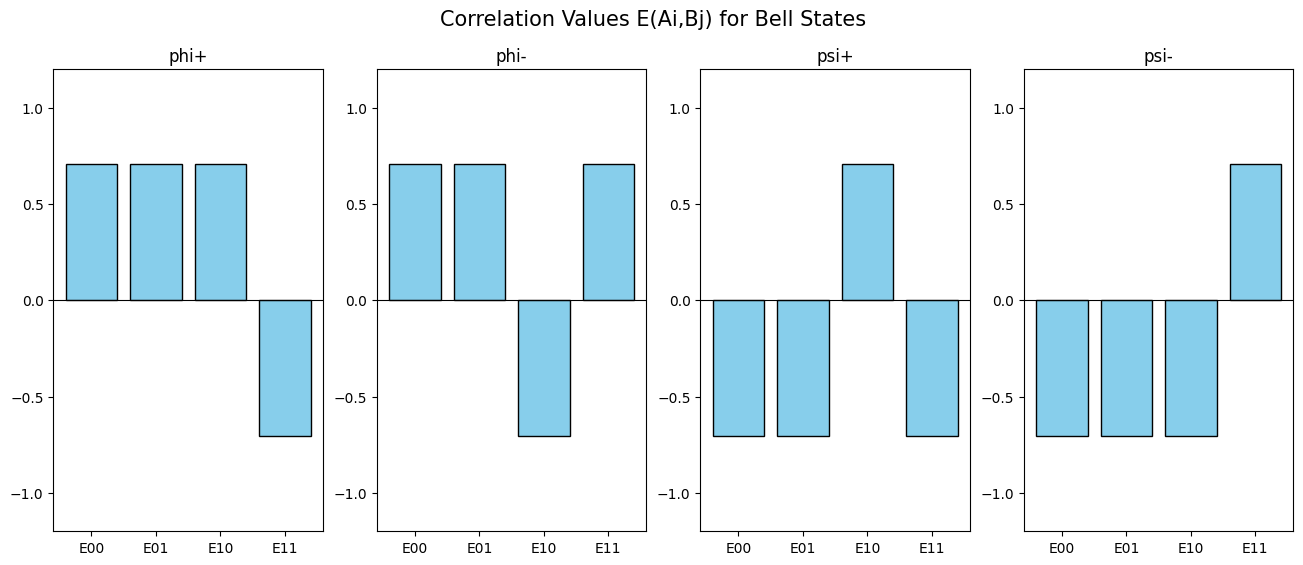

In [6]:
E_labels = ["E00", "E01", "E10", "E11"]

plt.figure(figsize=(16,6))

for i, lbl in enumerate(labels):
    plt.subplot(1,4,i+1)
    plt.bar(E_labels, corrs[lbl], color='skyblue', edgecolor='black')
    plt.ylim(-1.2, 1.2)
    plt.title(f"{lbl}")
    plt.axhline(0, color='black', linewidth=0.8)

plt.suptitle("Correlation Values E(Ai,Bj) for Bell States", fontsize=15)
plt.show()


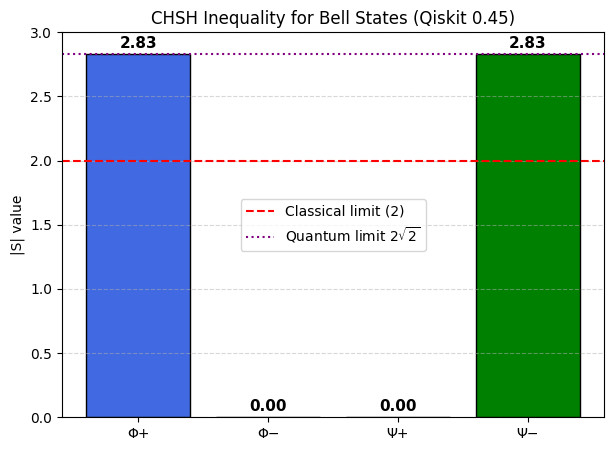

In [7]:
states_plot = ["Φ+", "Φ−", "Ψ+", "Ψ−"]

plt.figure(figsize=(7,5))
bars = plt.bar(states_plot, chsh_vals, color=["royalblue","tomato","gold","green"], edgecolor="black")

plt.axhline(2, color='red', linestyle='--', linewidth=1.5, label="Classical limit (2)")
plt.axhline(2*np.sqrt(2), color='purple', linestyle=':', linewidth=1.5, label=r'Quantum limit $2\sqrt{2}$')

for bar, val in zip(bars, chsh_vals):
    plt.text(bar.get_x()+bar.get_width()/2, val+0.05, f"{val:.2f}", ha='center', fontsize=11, fontweight='bold')

plt.title("CHSH Inequality for Bell States (Qiskit 0.45)")
plt.ylabel("|S| value")
plt.ylim(0, 3)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()
